<a href="https://colab.research.google.com/github/silviazandoli/explanaible_ai/blob/master/2_Flower_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


**Chapter 3 - Intrinsic Explainable Models - Logistic regression**

gianfagna_l_di_cecco_a_explainable_ai_with_python (Book)

- focus about the criteria that the ML model is adopting to assign the flower category.

In [70]:

#download from here https://archive.ics.uci.edu/dataset/53/iris
iris=pd.read_csv("Iris.csv")#,index_col='Id')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [84]:
iris.Species.replace({0:'Iris-setosa',1:'Iris-versicolor', 2:'Iris-virginica'},inplace=True)
#for the scatter plot
species_map={0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'}
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Data visualization

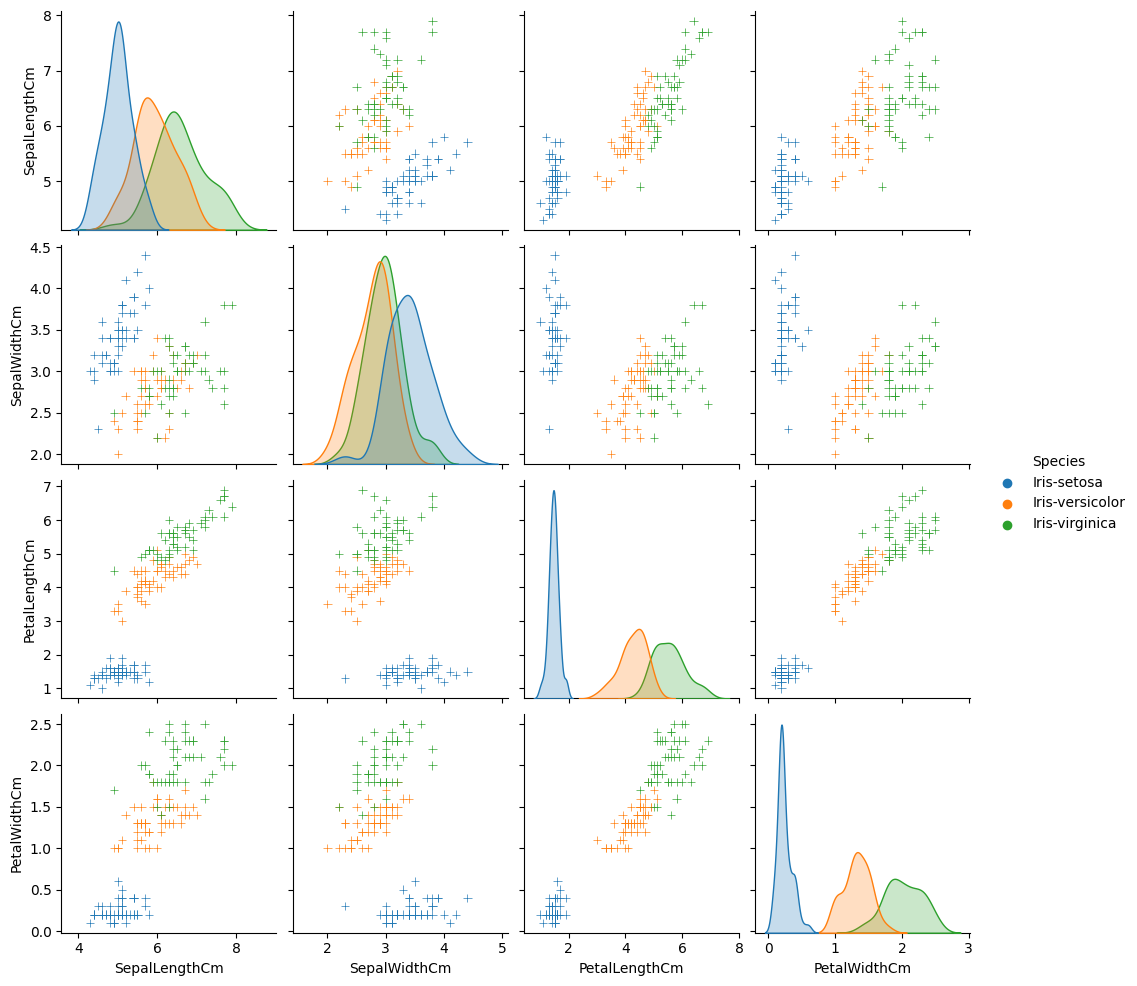

In [74]:
tmp = iris.drop('Id', axis=1)
import seaborn as sns
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

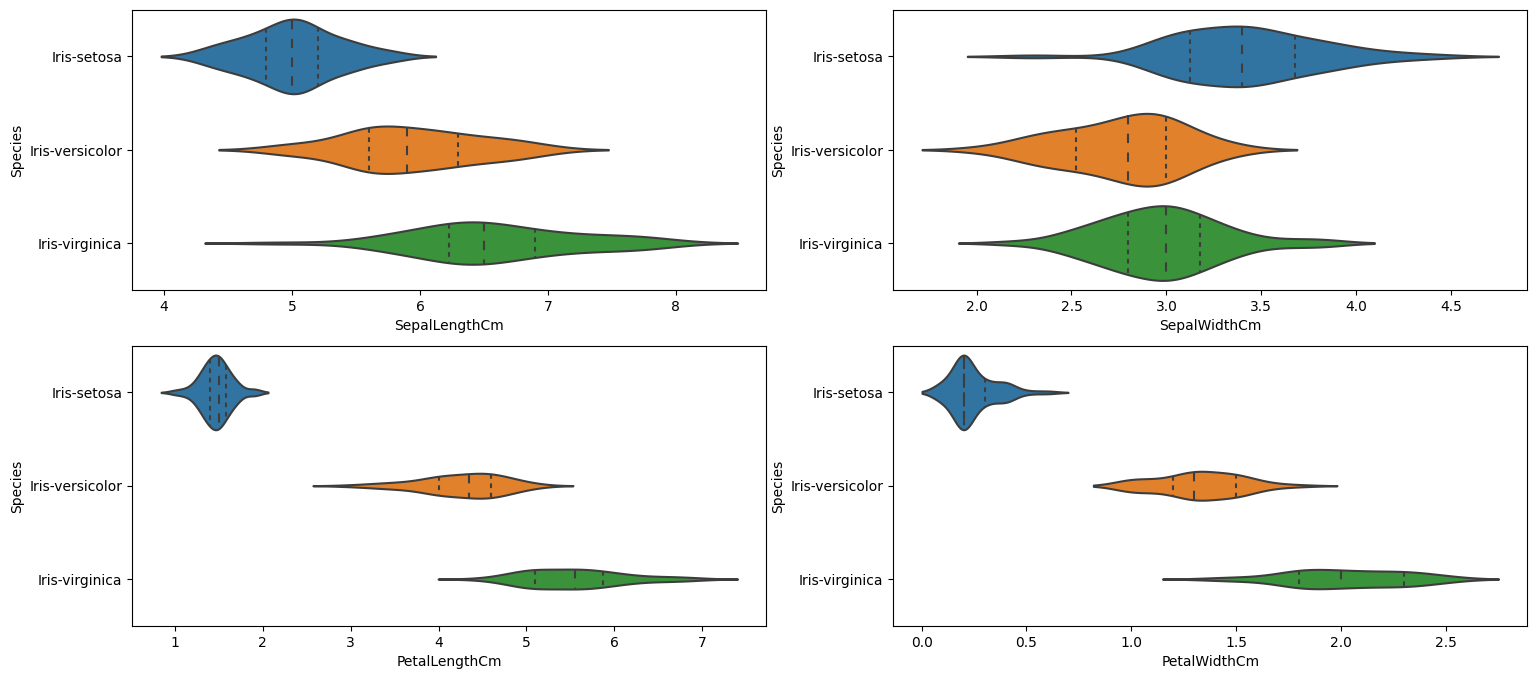

In [55]:
plt.figure(figsize=(18, 8))

plt.subplot(2, 2, 1)
g = sns.violinplot(y='Species', x='SepalLengthCm', data=iris, inner='quartile')

plt.subplot(2, 2, 2)
g = sns.violinplot(y='Species', x='SepalWidthCm', data=iris, inner='quartile')

plt.subplot(2, 2, 3)
g = sns.violinplot(y='Species', x='PetalLengthCm', data=iris, inner='quartile')

plt.subplot(2, 2, 4)
g = sns.violinplot(y='Species', x='PetalWidthCm', data=iris, inner='quartile')

plt.show()

In [75]:
X = iris.drop(['Id', 'Species'], axis=1)
y = iris['Species'] #target

X.shape, y.shape

((150, 4), (150,))

In [76]:
# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2210)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
print(predictions)# printing predictions
print()# Printing new line

#Check precision, recall, f1-score
from sklearn.metrics import classification_report,accuracy_score
print( classification_report(y_test, predictions) )
print( accuracy_score(y_test, predictions))

['Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'

How can our scholar in biology present the results? Which is more
important for the classification, the sepal length or width? The petal length or
width? These are the basic and natural questions that come from XAI and that we
need to answer.

Interpretare i coefficienti ...

1) scatterplot of the flower dataset

*     Iris classification based on Sepal_Length and Sepal_Width features
*   Iris classification based on Sepal_Length and Petal_Width features
* Iris-Setosa and No-Setosa




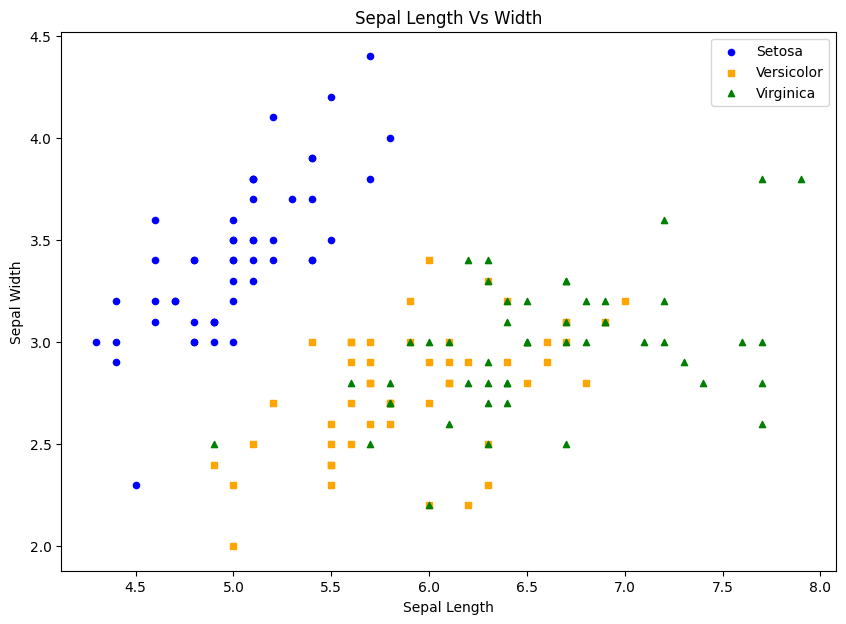

In [102]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', marker='o', color='blue',label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', marker='s', color='orange',label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', marker='^', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

You can see an outlier (the blue circle)

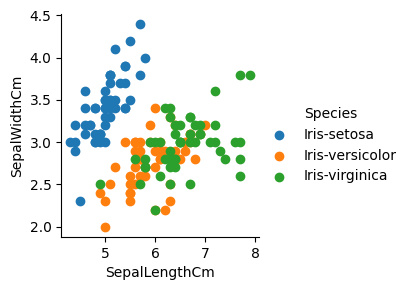

In [109]:
sns.FacetGrid(iris, hue='Species').map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()
plt.savefig('Sepal_LengthVsWidth_1.jpeg')

Using Petal Width produces a better split.

The sets of Iris Setosa and non-Setosa are better separated.

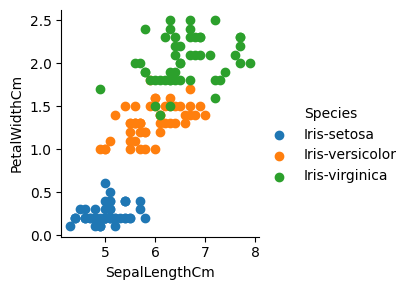

In [106]:
sns.FacetGrid(iris, hue='Species').map(plt.scatter, 'SepalLengthCm', 'PetalWidthCm').add_legend()

From this simple case on binary classification, **we see how to identify the couple
of features that are most important to classify** Iris Setosa vs Iris non-Setosa flowers.
Plotting the dataset on the plane of these features (Sepal Length and Petal Width),
we have a clear linear boundary to delimit the two sets. But how to find the equation
of this linear boundary to have a quantitative answer? It is easy to access the coefficients
of the logistic regression model to get the linear boundary equation directly.

Because of the scatter plots, we know that sepal length and petal length are the features that
produce the best separation of the two sets. How would these arguments change in
case of having three categories: Setosa, Versicolor, and Virginica? Not very much.
**We would do the same steps but with more coefficients and scatter plots to examine.**

In [111]:
W, b = logreg.coef_, logreg.intercept_
W,b

(array([[-0.39574624,  0.78588177, -2.24287961, -0.9702666 ],
        [ 0.4657411 , -0.27150753, -0.29057209, -0.52620468],
        [-0.06999486, -0.51437423,  2.5334517 ,  1.49647128]]),
 array([  9.15684819,   2.01640941, -11.17325759]))

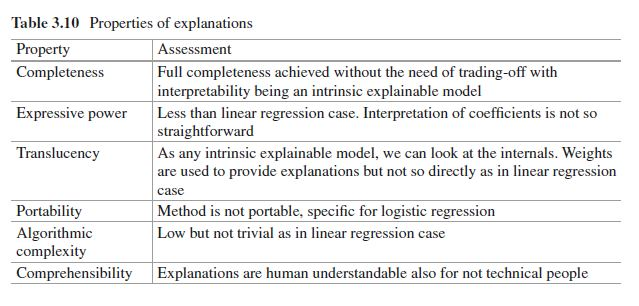